# 1. Importing

In [18]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style= 'darkgrid' )

#some built in functions
import itertools
from datetime import datetime, timedelta

import warnings
#to supress warning generated for fb prophet using .append method by default
warnings.simplefilter(action='ignore', category=FutureWarning) 
#to suppress warnings in Sarima model
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)

#importing high level interactive plotting libraries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# importing time series stats model
import statsmodels.api as sm
from statsmodels.api import tsa 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#importing Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

#sklearn library
from sklearn.preprocessing import MinMaxScaler

#importing fb prophet
from prophet import Prophet
#from fbprophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_plotly

#importing XG Boost 
import xgboost as xgb
from xgboost import plot_importance, plot_tree

#importing LSTM libraries
'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping'''

'import tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization\nfrom tensorflow.keras.optimizers import Adam\nfrom keras.callbacks import EarlyStopping'

In [19]:
ml_df = pd.read_csv('data_cleaned\ml_dataset.csv')

# 2. Data preprocessing

In [20]:
ml_df.head()

,order_id,customer_id,order_purchase_timestamp,order_estimated_delivery_date,qty,product_id,seller_id,shipping_limit_date,price,freight_value,...,seller_state,seller_lat,seller_lng,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,review_score,total_amount
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,...,SP,-23.680862,-46.444311,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.577482,-46.587077,4,29.99
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,...,SP,-23.680862,-46.444311,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,-23.564636,-46.534401,4,29.99
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,...,SP,-23.680862,-46.444311,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,-23.600462,-46.655318,5,29.99
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,...,SP,-23.680862,-46.444311,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,-27.546553,-48.497691,3,29.99
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,...,SP,-19.807885,-43.980818,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.186877,-44.540232,4,118.70


In [21]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110013 entries, 0 to 110012
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110013 non-null  object 
 1   customer_id                    110013 non-null  object 
 2   order_purchase_timestamp       110013 non-null  object 
 3   order_estimated_delivery_date  110013 non-null  object 
 4   qty                            110013 non-null  int64  
 5   product_id                     110013 non-null  object 
 6   seller_id                      110013 non-null  object 
 7   shipping_limit_date            110013 non-null  object 
 8   price                          110013 non-null  float64
 9   freight_value                  110013 non-null  float64
 10  product_name_lenght            110013 non-null  float64
 11  product_description_lenght     110013 non-null  float64
 12  product_photos_qty            

In [22]:
ml_df.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_estimated_delivery_date    0
qty                              0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_city                      0
seller_state                     0
seller_lat                       0
seller_lng                       0
customer_unique_id               0
customer_city                    0
customer_state                   0
customer_lat                     0
customer_lng                     0
review_score                     0
total_amount        

In [23]:
print(f" The number of unique orders : {ml_df['order_id'].nunique()}")
print(f" The number of unique customers : {ml_df['customer_unique_id'].nunique()}")
print(f" The total number of customer transactions specified by customer ids :  {ml_df['customer_id'].nunique()}")
print(f" Overall {round((ml_df['customer_unique_id'].nunique()/ml_df['customer_id'].nunique())*100, 2)} % transcations \
are made by new customers and {round((1 -(ml_df['customer_unique_id'].nunique()/ml_df['customer_id'].nunique()))*100,2)} % \
are made by repeat customers.")
print(f" The number of unique sellers {ml_df['seller_id'].nunique()}")
print(f" The number of unique products sold at Olist platform {ml_df['product_id'].nunique()}")

 The number of unique orders : 95832
 The number of unique customers : 92755
 The total number of customer transactions specified by customer ids :  95832
 Overall 96.79 % transcations are made by new customers and 3.21 % are made by repeat customers.
 The number of unique sellers 2965
 The number of unique products sold at Olist platform 32072


**Chúng ta sẽ sử dụng `total_amount` làm biến mục tiêu bằng cách nhân `qty` với `price`**

In [24]:
#converting date columns which are in object format to datetime format
ml_df['order_purchase_timestamp']=pd.to_datetime(ml_df['order_purchase_timestamp'])

In [25]:
ml_df['purchase_year']=pd.to_datetime(ml_df['order_purchase_timestamp']).dt.year
ml_df['purchase_month']=pd.to_datetime(ml_df['order_purchase_timestamp']).dt.month
ml_df['purchase_MMYYYY']=pd.to_datetime(ml_df['order_purchase_timestamp']).dt.strftime('%m-%Y')
ml_df['purchase_week']=pd.to_datetime(ml_df['order_purchase_timestamp']).dt.isocalendar().week
ml_df['purchase_dayofweek']=pd.to_datetime(ml_df['order_purchase_timestamp']).dt.weekday
ml_df['purchase_dayofmonth']=pd.to_datetime(ml_df['order_purchase_timestamp']).dt.day

In [26]:
# Creating new DataFrame with daily frequency and number of orders
df_agg = ml_df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D'))['total_amount'].sum().reset_index()
df_agg.set_index('order_purchase_timestamp', inplace=True)
df_agg.index.freq = 'D' # To keep pandas inference in check!

#reading top five rows
print(df_agg.head())

# checking the mean, max and count values.
print(df_agg.describe())

                          total_amount
order_purchase_timestamp              
2016-09-15                      269.94
2016-09-16                        0.00
2016-09-17                        0.00
2016-09-18                        0.00
2016-09-19                        0.00
        total_amount
count     714.000000
mean    20881.443333
std     16038.400478
min         0.000000
25%      9275.570000
50%     19772.815000
75%     30819.712500
max    184834.170000


# 3. Data Exploration

## 3.1. General Exploration

In [27]:
#we are creating pivot table with three index year, month and string MMYYY and getting sum of total_amount and number of orders
sales_df=ml_df.pivot_table(values = ['order_id', 'total_amount']
                              , index=['purchase_year','purchase_month','purchase_MMYYYY']
                              , aggfunc={'order_id':'nunique', 'total_amount':'sum'})
from plotly.subplots import make_subplots

#to plot number of orders by MMYYY
trace1 = go.Bar(
    x=sales_df.index.get_level_values(2),
    y=sales_df['order_id'],
    name='Orders',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
#to plot sum of total_amounts by MMYYY
trace2 = go.Scatter(
    x=sales_df.index.get_level_values(2),
    y=sales_df['total_amount'],
    name='Revenue',
    yaxis='y2' #using a right side y-axis

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1000, title = 'Revenue and Orders by Month-Year',xaxis=dict(
      tickangle=-90, title='Purchase Month'), yaxis=dict(title= 'Number of Orders'), yaxis2=dict(title= 'Revenue amount'))
fig.show()
#fig.show("svg")

In [28]:
#plotting daily data to get high level picture

fig = px.line(df_agg, x=df_agg.index, y='total_amount')

# axis labels and title
fig.update_layout(
    yaxis_title="Total Revenue earned (Brazilian Real)", 
    legend_title="", 
    title="Daily Revenue from Sept 2016 to Aug 2018"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

#annotate peak
fig.add_annotation(x='2017-11-24', y= 184834.17, text=f'Black Friday Sale', yanchor='bottom', 
                   showarrow=True, arrowhead=1, arrowsize=1, arrowwidth=2, arrowcolor="#636363",
                   ax=-20, ay=-30, font=dict(size=15, color="green", family="Courier New, monospace"),
                   align="left", bordercolor="green", borderwidth=2, bgcolor="#CFECEC", opacity=0.8)

fig.show()
#fig.show("svg")

#### Removing data before Jan 2017
Điều này bắt nguồn từ việc doanh số trước 1/2017 có nhiều thời điểm doanh số bằng 0 có thể dẫn đến kết quả sai lệch

In [29]:
# Removing rows before Jan 01 2017
daily_data = df_agg.loc[df_agg.index >= '2017-01-01']

In [30]:
daily_data.head()

,total_amount
order_purchase_timestamp,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,396.9


In [31]:
daily_data.describe()

,total_amount
count,606.000000
mean,24527.382343
std,14649.679500
min,0.000000
25%,14192.242500
50%,22579.390000
75%,32312.585000
max,184834.170000


## 3.2. Decomposing Time Series
Additive decomposition: $Trend$ + $Seasonality$ + $Residual$

In [32]:
# decomposing time series
decomposition = tsa.seasonal_decompose(daily_data, model='additive')

In [33]:
daily_df = daily_data.copy()

In [34]:
daily_df['Trend'] = decomposition.trend
daily_df['Seasonal'] = decomposition.seasonal
daily_df['Residual'] = decomposition.resid

In [35]:
#plotting the decomposed time series
cols_plot = ['total_amount', 'Trend', 'Seasonal', 'Residual']
fig = make_subplots(rows=4, cols=1, subplot_titles=cols_plot)

for i, cols_plot in enumerate(cols_plot):
    fig.add_trace(go.Scatter(x=daily_df.index, y=daily_df[cols_plot], name=cols_plot), row=i+1, col=1)

fig.update_layout(height=1200, width=1600, showlegend=False)
fig.show()

**Phân tích**
- Biểu đồ trend có xu hướng tăng trưởng nhẹ và đạt đỉnh vào 26/11/2017 do sự kiện giảm giá Black Friday (24/11/2017). Sau đó có giảm nhẹ rồi tăng trưởng trở lại.
- Biểu đồ seasonal cho thấy tính thời vụ hàng tuần. Khi đạt đỉnh vào 1 ngày trong tuần rồi giảm xuống.
- Biểu đồ residual hầu như giao động ở mức 0, ngoại trừ 1 số lần tang trưởng bất thường vào 29/09 và 24/11/

<Axes: title={'center': 'Pattern of revenue earned at week level'}, xlabel='Weekday', ylabel='total_amount'>

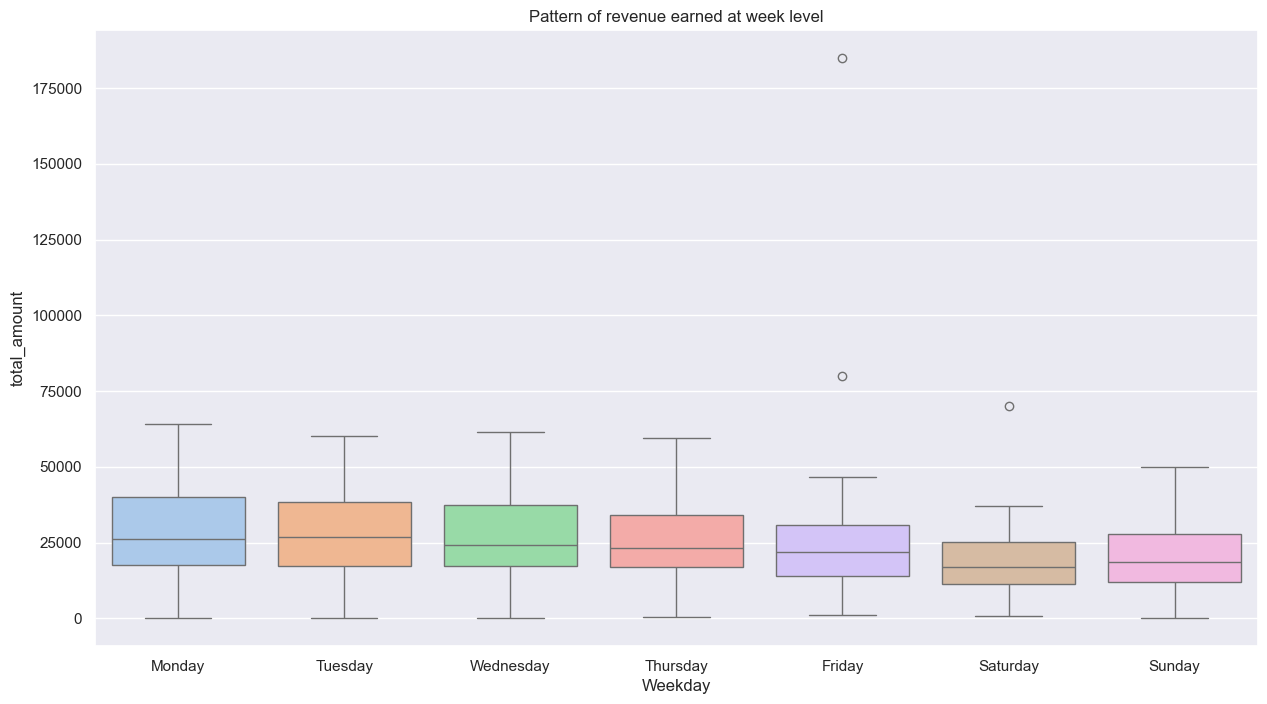

In [36]:
plt.subplots(figsize=(15,8))
plt.title('Pattern of revenue earned at week level')

df_week_check = daily_data.copy()
df_week_check['Weekday'] = df_week_check.index.weekday
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_week_check['Weekday'] = df_week_check['Weekday'].apply(lambda x: weekday[x])

df_week_check['Weekday'] = pd.Categorical(df_week_check['Weekday'], categories=weekday, ordered=True)


sns.boxplot(x='Weekday', y='total_amount', data=df_week_check, palette='pastel')

**Observations**
- Ta có thể thấy doanh thu kiếm được cao nhất vào thứ 2, 3,4 và sau đó giảm nhẹ vào cuối tuần. 

## 3.3. Checking stationery
Chuỗi dừng (stationary stochastic process) là một quá trình ngẫu nhiên mà giá trị trung bình và phương sai không thay đổi theo thời gian, cũng như hiệp phương sai (covariance) chỉ phụ thuộc thời khoảng cách thời gian

Việc kiểm tra tính dừng (stationarity) của chuỗi là một bước quan trọng, nếu không có nghĩa là dữ liệu đó thay đổi theo thời gian và sẽ khó dự báo được dữ liệu đó.

Nếu giá trị trung bình và phương sai của chuỗi thời gian không đổi thì điều đó có nghĩa là chuỗi thời gian đó có tính ổn định.


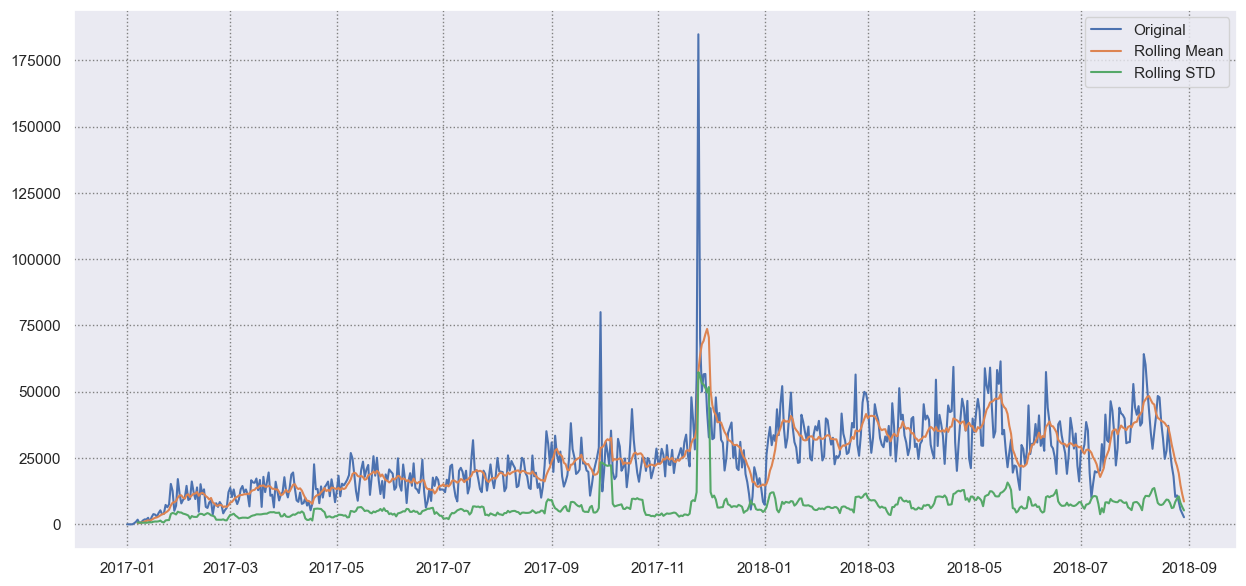

In [37]:
#plotting rolling mean and standard deviation.

roll_mean = daily_df['total_amount'].rolling(window=7).mean() # 7-day rolling mean
roll_std = daily_df['total_amount'].rolling(window=7).std() # 7-day rolling standard deviation
    
fig, ax = plt.subplots(figsize=(15,7), facecolor='w')
ax.plot(daily_df['total_amount'], label='Original')
ax.plot(roll_mean, label='Rolling Mean')
ax.plot(roll_std,  label='Rolling STD')

ax.legend(loc='upper right')
plt.grid(linestyle=":", color='grey')
plt.show()

**Observation**
- Ta có thể thấy std và mean không phải hằng số, có nghĩa là chuỗi thời gian này không đứng yên.

### Sử dụng ADF và KPSS để kiểm tra tính dừng

#### ADF (Augmented Dickey-Fuller)
Kiểm định ADF được sử dụng để kiểm tra xem một chuỗi thời gian có một gốc đơn vị hay không. Nói cách khác, nó kiểm tra liệu chuỗi có tính dừng hay không.

$H_0$: Chuỗi có unit root (không dừng).\
$H_1$: Chuỗi không có unit root (dừng).

Nếu p-value lớn hơn mức ý nghĩa, chuỗi không dừng.

#### KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
$H_0$ : Quá trình này có xu hướng dừng. (Ngược với $H_0$ của ADF)\
$H_1$: Chuỗi có unit root (không dừng)


In [143]:
def adf_test(df) -> None:
    """
    Augmented Dickey Fuller Test
    - The null hypothesis for this test is that there is a unit root.
    - The alternate hypothesis is that there is no unit root in the series.
    ---
    Args:
        df (pd.DataFrame): Dataframe contains the timeseries data
        
    Returns: None
    """
    
    adf_stat, p_value, n_lags, n_observ, crit_vals, icbest = adfuller(df)
    
    print('\nAugmented Dickey Fuller Test')
    print('---'*15)
    print('ADF Statistic: %f' % adf_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Number of observations used: {n_observ}')
    print(f'T values corresponding to adfuller test:')
    for key, value in crit_vals.items():
        print(key, value)


def kpss_test(df) -> None:
    """
    Kwiatkowski-Phillips-Schmidt-Shin test for stationary.
    - The null hypothesis for the test is that the data is stationary.
    - The alternate hypothesis for the test is that the data is not stationary.
    ---
    Args:
        df (pd.DataFrame): Dataframe that contains the timeseries data
        
    Returns: None
    """
    
    kpss_stat, p_value, n_lags, crit_vals = kpss(df, nlags='auto', store=False)
    print('\nKwiatkowski-Phillips-Schmidt-Shin test')
    print('---'*15)
    print('KPSS Statistic: %f' % kpss_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Critical values of KPSS test:')
    for key, value in crit_vals.items():
        print(key, value)

In [144]:
adf_test(daily_df['total_amount'])
kpss_test(daily_df['total_amount'])


Augmented Dickey Fuller Test
---------------------------------------------
ADF Statistic: -3.575418
p-value: 0.006249
Number of lags used: 8
Number of observations used: 597
T values corresponding to adfuller test:
1% -3.4413510722333087
5% -2.8663934413235266
10% -2.5693547658168003

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 2.703197
p-value: 0.010000
Number of lags used: 15
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


**Observation**
- Vì theo ADF, p-value: $0.006249 < 0.05$, ta bác bỏ giả thiết $H_0$. Theo đó chuỗi không có unit root, chuỗi thời gian dừng.
- Vì theo KPSS, p-value: $0.01 < 0.05$, ta bác bỏ giả thiết $H_0$. Theo đó chuỗi thời gian không dừng theo xu hướng. 
- Theo [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html#Detrending-by-Differencing), nếu: **KPSS chỉ ra chuỗi không dừng trong khi ADF chỉ ra chuỗi dừng. Đây là chuỗi dừng sai phân.**



In [145]:
# differecing with previous day
daily_df['day_difference'] = daily_df['total_amount'].diff(1)

In [146]:
adf_test(daily_df['day_difference'].dropna())
kpss_test(daily_df['day_difference'].dropna())


Augmented Dickey Fuller Test
---------------------------------------------
ADF Statistic: -9.426039
p-value: 0.000000
Number of lags used: 12
Number of observations used: 592
T values corresponding to adfuller test:
1% -3.441444394224128
5% -2.8664345376276454
10% -2.569376663737217

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 0.108792
p-value: 0.100000
Number of lags used: 29
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


**Observation**
- Vì theo ADF, p-value: $0.00 < 0.05$, ta có thể bác bỏ giả thiết $H_0$, chuỗi dừng
- Vì theo KPSS, p-value: $0.10 > 0.05$, ta không thể bác bỏ giả thiết  $H_0$, chuỗi dừng

**Cả 2 kiểm định trên đưa đến 1 kết - Đây là chuỗi dừng**

# 4. Preparation for Modeling

## 4.1. Train and Test Split

In [42]:
# Train - Test : 80 - 20
def train_test_split(df, train_end, test_set):
    train_set = df[df.index <= train_end]
    test_set = df[df.index > train_end]
    return train_set, test_set

train_end = '2018-04-30'
test_end = '2018-08-29'

train_df, test_df = train_test_split(daily_data, train_end, test_end)

In [43]:
print(f'The Train data has time range :Shape {train_df.shape} | {train_df.index[0]} to {train_df.index[-1]}')
print(f'The Test data has time range :Shape {test_df.shape} | {test_df.index[0]} to {test_df.index[-1]}' )

The Train data has time range :Shape (485, 1) | 2017-01-01 00:00:00 to 2018-04-30 00:00:00
The Test data has time range :Shape (121, 1) | 2018-05-01 00:00:00 to 2018-08-29 00:00:00


## 4.2. Defining functions for plotting predictions and forecast

In [44]:
def plot_forecast(train_set, test_set, forecast_series:pd.Series):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_set.index, y=train_set, mode='lines', name='Train'))
    fig.add_trace(go.Scatter(x=test_set.index, y=test_set, mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=forecast_series.index, y=forecast_series, mode='lines', name='Forecast'))

    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(yaxis_title='Revenue amount', xaxis_title='Date', title='Daily Sales amount and forecast')
    fig.show()

In [45]:
def plot_test_predictions(test_set, predictions) -> None:
    test_set = pd.Series(test_set, index=test_set.index)
    predictions = pd.Series(predictions, index=test_set.index)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=test_set.index, y=test_set.values, mode='lines', name='Test'))
    fig.add_trace(go.Scatter(x=predictions.index, y=predictions.values, mode='lines', name='Predictions'))

    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(yaxis_title='Revenue amount for test and predicted values', xaxis_title='Date', title='Daily revenue amount')
    fig.show()

## 4.3. Defining functions for evaluation

Ta sử dụng 2 hàm MAPE và RMSE để đánh giá hiệu suất mô hình.\

$Y$ là giá trị thực tế và $Predictions$ là giá trị dự đoán cho n lần quan sát.


MAPE (Mean absolute percentage error):

$\frac{1}{n} \sum_{i=1}^{n} {| \frac{Y_{actual_i} - Predictions_{i}}{Y_{actual_i}} |} \times{100}$

RMSE (Root mean square deviation):
$$ \sqrt{\frac{1}{n} \sum_{i=1}^{n} {{(Y_{actual_i} - Predictions_{i})}^2 }} $$

In [46]:
def mape(test_set, predicted) -> float:
    mape_result=round(np.mean(np.abs((test_set - predicted) / test_set)) * 100, 2)
    return mape_result

def rmse(test_set, predicted) -> float:
    rmse_result = round(np.sqrt(np.mean((test_set - predicted)**2)), 2)
    return rmse_result

# 5. Modeling (SARIMA) 
SARIMA (Seasonal Autoregressive Integrated Moving Average) là một phương pháp thống kê phổ biến trong phân tích chuỗi thời gian, đặc biệt là khi dữ liệu có tính mùa vụ rõ rệt. SARIMA mở rộng mô hình ARIMA bằng cách bao gồm các thành phần mùa vụ để xử lý các chu kỳ lặp lại theo thời gian.

Sử dụng biểu đồ ACF và PACF để xác định các bậc $p,d,q,P,D,Q$


## 5.1. Plotting ACF and PACF plot

In [47]:
def plot_acf_pacf(df, acf_lags: int, pacf_lags: int) -> None:
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,9), facecolor='w')

    plot_acf(df, lags=acf_lags, ax=ax1)
    plot_pacf(df, lags=pacf_lags, ax=ax2, method='ywm')

    ax1.set_title(f"Autocorrelation {df.name}", fontsize=15,pad=10)
    ax1.set_xlabel('Lags (days)', fontsize=12)
    ax1.set_ylabel('Sales amount', fontsize=12)

    ax2.set_title(f"Partial Autocorrelation {df.name}", fontsize=15,pad=10)
    ax2.set_xlabel('Lags (days)', fontsize=12)
    ax2.set_ylabel('Sales amount', fontsize=12)

    ax1.grid(linestyle=':', linewidth=1, color='grey')
    ax2.grid(linestyle=':', linewidth=1, color='grey')

    plt.show()


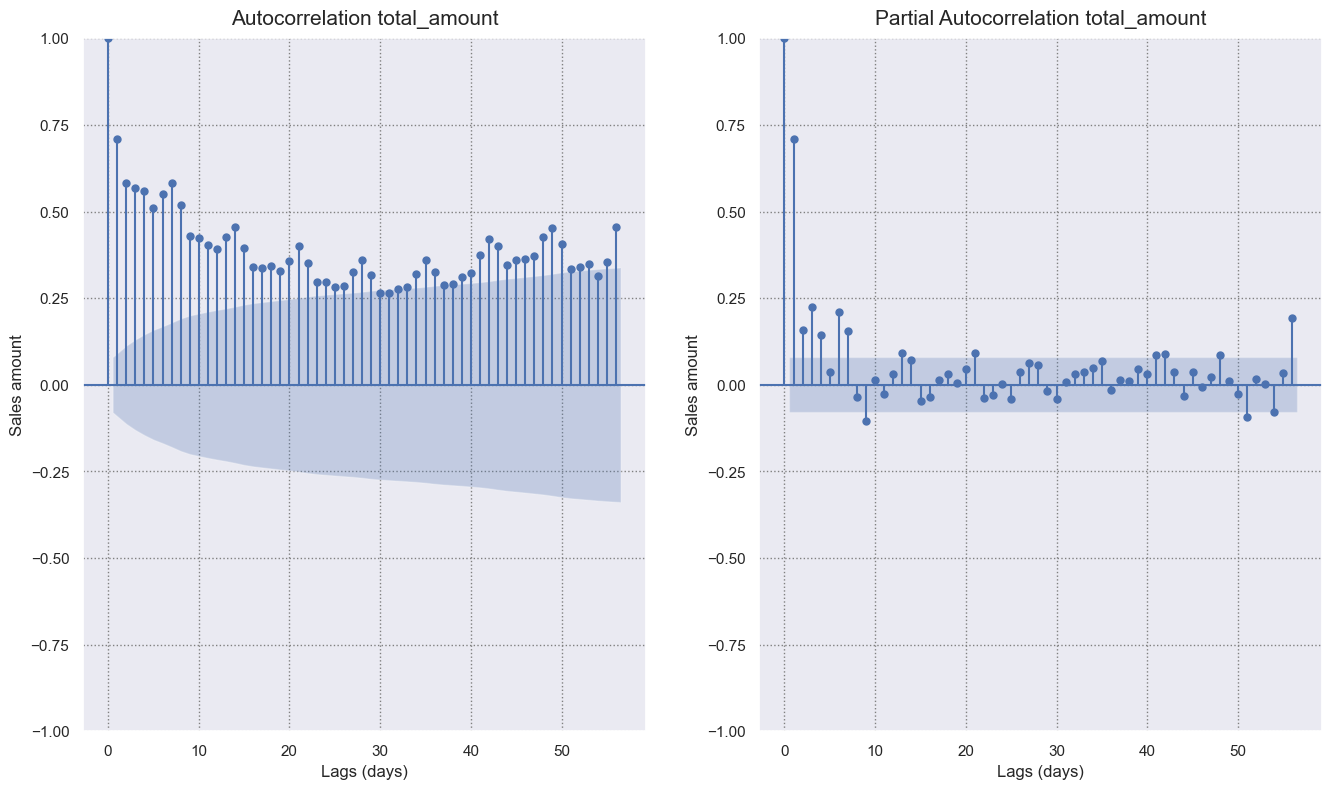

In [48]:
plot_acf_pacf(daily_df['total_amount'], acf_lags=56, pacf_lags=56)

**Observations**:

ACF:
 - Biểu đồ cho thấy nhiều độ trễ đáng kể. Trong ACF không có độ trễ nào về 0. Điều này cho thấy dữ liệu không dừng như khi sử dụng thống kê kiểm định.
- Ta có thể thấy Lags đạt đỉnh sau mỗi 7 ngày. Điều này cho thấy tính mùa vụ của mô hình

PCF:
- PACF có nhiều độ trễ đáng kể nhưng lại ít dao động.

Ta sẽ lấy sai phân ngày và sai phân mùa vụ để vẽ *plot* nhằm loại bỏ xu hướng và tính mùa vụ

In [49]:
daily_df['double_difference'] = daily_df['day_difference'].diff(7)

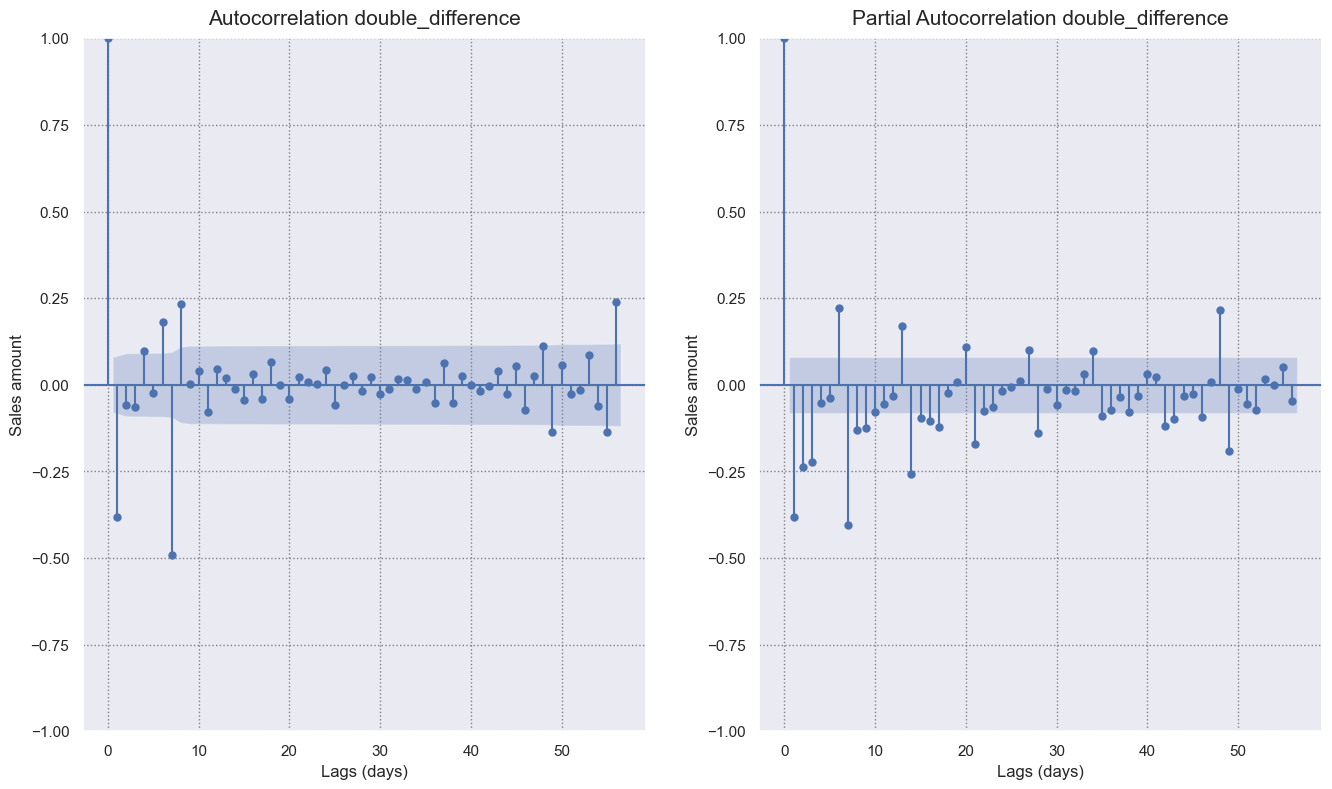

In [50]:
plot_acf_pacf(daily_df['double_difference'].dropna(), acf_lags=56,pacf_lags=56)

**Observation**:

ACF:
- Có khá nhiều độ trễ trở về 0. Có nhiều độ trễ đáng kể ở 1,4,6,7,8
- Độ trễ ở lag 7 là quan trọng nhất nó giúp ta xác định seasonal MA
- 

PACF:
- Đỉnh cao nhất ở lag 7

## 5.2. Appplying SARIMA model

In [51]:
# Set Hyper-parameters
p, d, q = 1,1,1
P, D, Q = 0,1,1
s=7

sarima_model = SARIMAX(train_df['total_amount'], order=(p,d,q), seasonal_order=(P,D,Q,s))
sarima_model_fit = sarima_model.fit(disp=0)
print(sarima_model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      total_amount   No. Observations:                  485
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -5042.977
Date:                           Wed, 29 May 2024   AIC                          10093.954
Time:                                   21:31:42   BIC                          10110.624
Sample:                               01-01-2017   HQIC                         10100.509
                                    - 04-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2609      0.044      5.920      0.000       0.175       0.347
ma.L1         -0.8489      0.032    -26.659

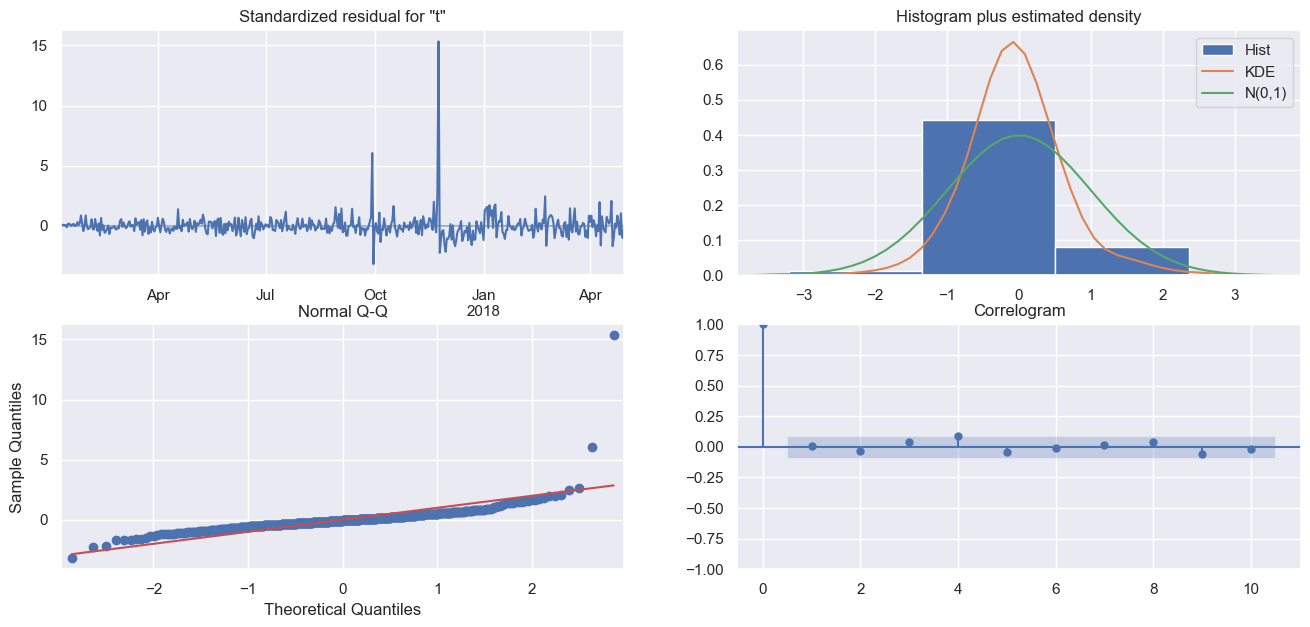

In [52]:
sarima_model_fit.plot_diagnostics(figsize=(16,7))
plt.show()

**Biểu đồ Standardized residual for "t"**: 

## 5.3. Plotting predictions and evaluate SARIMA model


In [53]:
# define prediction period
pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

sarima_prediction = sarima_model_fit.predict(start=pred_start_date, end=pred_end_date, dynamic=True)
sarima_residual = test_df['total_amount'] - sarima_prediction 

In [54]:
# evaluation SARIMA model
sarima_rmse = rmse(test_df['total_amount'], sarima_prediction)
sarima_mape = mape(test_df['total_amount'], sarima_prediction)

print(f'RMSE: {sarima_rmse}')
print(f'MAPE: {sarima_mape}')

RMSE: 13810.61
MAPE: 68.99


In [55]:
plot_test_predictions(test_df['total_amount'], sarima_prediction)

In [129]:
# Sarima forecast
days = 180

sarima_forecast = sarima_model_fit.forecast(steps=days)
sarima_forecast_series = pd.Series(sarima_forecast, index=sarima_forecast.index)

#cắt các giá trị 0
sarima_forecast_series[sarima_forecast_series < 0] = 0



In [130]:
#plotting the forecast
plot_forecast(train_df['total_amount'], test_df['total_amount'], sarima_forecast_series)

**Observation:**
- Mô hình khá chính xác khi dự báo hàng ngày, nhưng có sự sai khác ở cấp độ tuần, tháng
- Có thể tối ưu thêm mô hình bằng cách bổ sung các ngày nghỉ lễ để xác định sự ảnh hưởng của ngày lễ lên mua bán

## 5.4. Adding variable holiday for SARIMA 

In [58]:
holiday = pd.read_csv('data_cleaned\holiday.csv', index_col=0)

In [59]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2017-01-01 to 2018-12-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   is_holiday  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [60]:
holiday.index = pd.to_datetime(holiday.index)

In [61]:
holiday.head()

,is_holiday
2017-01-01,1.0
2017-02-27,1.0
2017-02-28,1.0
2017-03-01,1.0
2017-04-14,1.0


In [62]:
#filling the missing dates
idx = pd.date_range('2017-01-01', '2018-12-31')
holiday = holiday.reindex(idx, fill_value=0)

holiday['is_holiday'] = holiday['is_holiday'].astype(int)

In [63]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   is_holiday  730 non-null    int32
dtypes: int32(1)
memory usage: 8.6 KB


Vì doanh thu không chỉ chịu ảnh hưởng bởi các ngày nghỉ lễ mà còn các ngày mà nhu cầu mua sắm tăng cao hay giảm giá như Black Friday, CyberMonday, Valentine, Lễ tạ ơn

In [64]:
holiday.loc[((holiday.index.day== 14) & (holiday.index.month==2)),:]=1
holiday.loc[((holiday.index== '2017-11-24') | (holiday.index== '2018-11-23')),:]=1
#holiday.loc[((holiday.index== '2017-11-24') | (holiday.index== '2018-11-23') ),:]=1

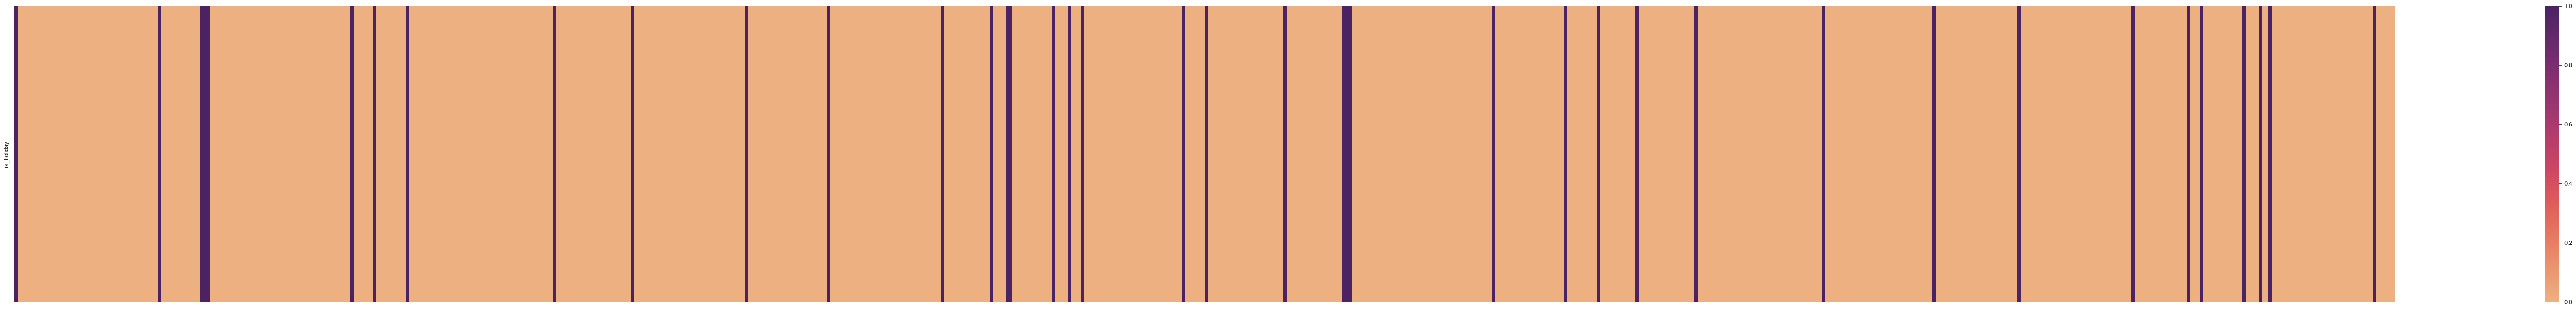

In [65]:
#plot to show holidays
plt.figure(figsize=(100,10))
sns.heatmap(holiday.T, cmap='flare', xticklabels=[])
plt.show()

In [66]:
holiday_df = holiday.loc[holiday.index <= '2018-08-29']

In [67]:
dfex = pd.concat([daily_data, holiday_df], axis=1)

In [68]:
#plotting daily data to get high level picture
fix = px.line(dfex, x=dfex.index, y='total_amount')

fix.update_layout(
    yaxis_title="Total Revenue earned (Brazilian Real)", 
    legend_title="", 
    title="Daily Revenue from Jan 2017 to Aug 2018 \n (Red dash lines show holidays)"
)
v_line = dfex.loc[dfex['is_holiday']==1].index
for idx in v_line:
    fix.add_vline(idx,line_width=0.5, line_dash='dash', line_color='red')

fix.update_xaxes(rangeslider_visible=True)

fix.show()


In [69]:
#splitting the data
train_dfex, test_dfex = train_test_split(dfex, train_end, test_end)

## 5.5. Applying grid search on SARIMA model with holiday

In [70]:
p = range(1,5)
d = range(1,2)
q = range(1,3)
s = 7

P = range(0,1)
D = range(1,2)
Q = range(1,3)

pdq = list(itertools.product(p,d,q))
seasonal_PDQ = list(itertools.product(P,D,Q))
seasonal_PDQS = [(x[0], x[1], x[2], s) for x in seasonal_PDQ]

# grid search for hyper parameters
def grid_search_sarima(train_set,test_set) -> None:
    warnings.simplefilter('ignore', category=UserWarning)

    # set initial variables
    pred_start_date = test_set.index[0]
    pred_end_date = test_set.index[-1]
    summary = pd.DataFrame(columns=['Model', 'MSE', 'AIC', 'BIC', 'RMSE', 'MAPE'])
    data = {}

    #grid search
    for order in pdq:
        for seasonal_order in seasonal_PDQS:
            model = SARIMAX(train_set['total_amount'], 
                            seasonal_order=seasonal_order,
                            order=order,
                            exog=train_set['is_holiday'])
            results = model.fit(disp=0)
            predictions = results.predict(start=pred_start_date, end=pred_end_date, exog=test_set['is_holiday']) 

            data= { "Model":f'{order}x{seasonal_order}',
                    "MSE":results.mse,
                    "AIC":results.aic, 
                    "BIC":results.bic,
                    "RMSE": rmse(test_set['total_amount'], predictions),
                    "MAPE": mape(test_set['total_amount'], predictions) }

            summary=pd.concat([summary, pd.DataFrame(data, columns=summary.columns, index=[1])], ignore_index=True)
    
    return summary


In [71]:
grid_search_sarima(train_dfex, test_dfex)

,Model,MSE,AIC,BIC,RMSE,MAPE
0,"(1, 1, 1)x(0, 1, 1, 7)",8.579280e+07,10098.803468,10119.641050,16149.24,81.58
1,"(1, 1, 1)x(0, 1, 2, 7)",8.590407e+07,10098.205820,10123.210919,14130.13,70.50
2,"(1, 1, 2)x(0, 1, 1, 7)",8.660065e+07,10186.915064,10211.920163,13312.72,65.66
3,"(1, 1, 2)x(0, 1, 2, 7)",8.654337e+07,10188.869615,10218.042231,13383.17,66.10
4,"(2, 1, 1)x(0, 1, 1, 7)",8.607760e+07,10098.721891,10123.726990,13809.30,68.67
5,"(2, 1, 1)x(0, 1, 2, 7)",8.653358e+07,10186.651548,10215.824164,13448.51,66.51
6,"(2, 1, 2)x(0, 1, 1, 7)",8.388088e+07,10182.469911,10211.642526,15136.09,76.13
7,"(2, 1, 2)x(0, 1, 2, 7)",8.371795e+07,10184.337047,10217.677179,15121.01,76.04
8,"(3, 1, 1)x(0, 1, 1, 7)",8.421902e+07,10182.809279,10211.981894,14936.27,75.13
9,"(3, 1, 1)x(0, 1, 2, 7)",8.391121e+07,10184.273723,10217.613855,15020.86,75.55


In [133]:
# Call the function and store the result
result = grid_search_sarima(train_dfex, test_dfex)

# Sort the result by 'MAPE' in ascending order
sorted_result = result.sort_values('MAPE')

# Print the sorted result
print(sorted_result)

                     Model           MSE           AIC           BIC  \
2   (1, 1, 2)x(0, 1, 1, 7)  8.660065e+07  10186.915064  10211.920163   
3   (1, 1, 2)x(0, 1, 2, 7)  8.654337e+07  10188.869615  10218.042231   
5   (2, 1, 1)x(0, 1, 2, 7)  8.653358e+07  10186.651548  10215.824164   
4   (2, 1, 1)x(0, 1, 1, 7)  8.607760e+07  10098.721891  10123.726990   
1   (1, 1, 1)x(0, 1, 2, 7)  8.590407e+07  10098.205820  10123.210919   
10  (3, 1, 2)x(0, 1, 1, 7)  8.341646e+07  10180.005981  10213.346113   
8   (3, 1, 1)x(0, 1, 1, 7)  8.421902e+07  10182.809279  10211.981894   
9   (3, 1, 1)x(0, 1, 2, 7)  8.391121e+07  10184.273723  10217.613855   
12  (4, 1, 1)x(0, 1, 1, 7)  8.338998e+07  10181.694694  10215.034826   
13  (4, 1, 1)x(0, 1, 2, 7)  8.316296e+07  10183.326100  10220.833749   
14  (4, 1, 2)x(0, 1, 1, 7)  8.330918e+07  10175.209554  10212.717203   
11  (3, 1, 2)x(0, 1, 2, 7)  8.332239e+07  10183.265202  10220.772850   
7   (2, 1, 2)x(0, 1, 2, 7)  8.371795e+07  10184.337047  10217.67

In [134]:
sorted_result

,Model,MSE,AIC,BIC,RMSE,MAPE
2,"(1, 1, 2)x(0, 1, 1, 7)",8.660065e+07,10186.915064,10211.920163,13312.72,65.66
3,"(1, 1, 2)x(0, 1, 2, 7)",8.654337e+07,10188.869615,10218.042231,13383.17,66.10
5,"(2, 1, 1)x(0, 1, 2, 7)",8.653358e+07,10186.651548,10215.824164,13448.51,66.51
4,"(2, 1, 1)x(0, 1, 1, 7)",8.607760e+07,10098.721891,10123.726990,13809.30,68.67
1,"(1, 1, 1)x(0, 1, 2, 7)",8.590407e+07,10098.205820,10123.210919,14130.13,70.50
10,"(3, 1, 2)x(0, 1, 1, 7)",8.341646e+07,10180.005981,10213.346113,14950.48,75.10
8,"(3, 1, 1)x(0, 1, 1, 7)",8.421902e+07,10182.809279,10211.981894,14936.27,75.13
9,"(3, 1, 1)x(0, 1, 2, 7)",8.391121e+07,10184.273723,10217.613855,15020.86,75.55
12,"(4, 1, 1)x(0, 1, 1, 7)",8.338998e+07,10181.694694,10215.034826,15026.79,75.58
13,"(4, 1, 1)x(0, 1, 2, 7)",8.316296e+07,10183.326100,10220.833749,15083.97,75.86


SARIMA order (1,1,2)x(0,1,1,7) cho ra MAPE và RMSE thấp nhất, do vậy mô hình dự báo có độ chính xác cao nhất

In [72]:
#set Hyper-parameter 
p, d, q = 1,1,2
P, D, Q = 0,1,1
s=7

sarima_model = SARIMAX(train_df['total_amount'], order=(p,d,q), seasonal_order=(P,D,Q,s), exog=train_dfex[['is_holiday']])
sarimax_model_fit = sarima_model.fit(disp=0)
print(sarimax_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        total_amount   No. Observations:                  485
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 7)   Log Likelihood               -5087.458
Date:                             Wed, 29 May 2024   AIC                          10186.915
Time:                                     21:32:00   BIC                          10211.920
Sample:                                 01-01-2017   HQIC                         10196.747
                                      - 04-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
is_holiday  4390.8251   1903.409      2.307      0.021     660.212    8121.438
ar.L1          0.0746      

## 5.6. Plotting predictions and evaluate SARIMA model with holiday


In [73]:
#predicting 
pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

sarimax_predictions = sarimax_model_fit.predict(start=pred_start_date, end=pred_end_date, exog=(test_dfex[['is_holiday']]) )

In [74]:
sarimax_root_mean_squared_error = rmse(test_dfex['total_amount'], sarimax_predictions)
sarimax_mape=mape(test_dfex['total_amount'], sarimax_predictions)

print(f'Root Mean Squared Error | RMSE: {sarimax_root_mean_squared_error}')
print(f'Mean Absolute Percentage Error | MAPE: {sarimax_mape}')

Root Mean Squared Error | RMSE: 13312.72
Mean Absolute Percentage Error | MAPE: 65.66


In [75]:
plot_test_predictions(test_dfex['total_amount'], sarimax_predictions)

In [76]:
start_date = datetime(2018, 4, 30)
end_date = datetime(2018, 8, 8)

# Tính số ngày giữa hai ngày
delta = end_date - start_date
number_of_days = delta.days

print(f"Số ngày từ {start_date.date()} đến {end_date.date()} là: {number_of_days} ngày")


Số ngày từ 2018-04-30 đến 2018-08-08 là: 100 ngày


In [77]:
# Forecast Window
exog=holiday.loc[(holiday.index> '2018-04-30') & (holiday.index<= '2018-10-27') ]
exog_df=exog.copy()

days = 180
exog_param=(exog_df[['is_holiday']])
sarimax_forecast = sarimax_model_fit.forecast(days, exog=exog_param)
sarimax_forecast_series = pd.Series(sarimax_forecast, index=sarimax_forecast.index)

In [78]:
plot_forecast(train_dfex['total_amount'], test_dfex['total_amount'], sarimax_forecast_series)

# 6. Modelling (Facebook Prophet) 

## 6.1. Prepare data for FB prophet
Input: 
|ds (date stampe)|y (giá trị của chuỗi)|
|--|--|

In [79]:
prophet_df = dfex['total_amount'].reset_index()
prophet_df.rename(columns={"index": "ds", "total_amount": "y"}, inplace=True)

prophet_train = train_df["total_amount"].reset_index()
prophet_train.rename(columns={"order_purchase_timestamp": "ds", "total_amount": "y"}, inplace=True)
prophet_test = test_df["total_amount"].reset_index()
prophet_test.rename(columns={"order_purchase_timestamp": "ds", "total_amount": "y"}, inplace=True)

In [80]:
prophet_df.head()

,ds,y
0,2017-01-01,0.0
1,2017-01-02,0.0
2,2017-01-03,0.0
3,2017-01-04,0.0
4,2017-01-05,396.9


## 6.2. Applying a basic FB prophet
Vì dữ liệu có tính thời vụ nên yearly_seasonality, daily_seasonality, weekly_seasonality = True

In [81]:
fb_baseline = Prophet(
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,    
)
fb_baseline.fit(prophet_train)

21:32:01 - cmdstanpy - INFO - Chain [1] start processing
21:32:01 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
# predictions dataframe
future_base = fb_baseline.make_future_dataframe(periods=len(test_df), freq='D')

In [83]:
# make forecast
forecast_base = fb_baseline.predict(future_base)
forecast_base[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
601,2018-08-25,38691.084340,27054.813226,50063.006518
602,2018-08-26,39781.312601,29359.901496,50936.454712
603,2018-08-27,47547.971606,36116.977900,59602.331911
604,2018-08-28,47991.691293,37776.703134,58099.043768
605,2018-08-29,46797.839222,36209.985311,57883.838321


In [84]:
forecast_base[-121:].reset_index()['yhat']

0      41593.496275
1      40190.664247
2      40229.804026
3      40780.866983
4      34048.499748
           ...     
116    38691.084340
117    39781.312601
118    47547.971606
119    47991.691293
120    46797.839222
Name: yhat, Length: 121, dtype: float64

## 6.3. Plotting and evaluate Basic Prophet model

In [85]:
# evaluating the model
fb_rmse = rmse(prophet_test['y'], forecast_base[-121:].reset_index()['yhat'])
fb_mape = mape(prophet_test['y'], forecast_base[-121:].reset_index()['yhat'])

print(f'Root Mean Squared Error | RMSE: {fb_rmse}')
print(f'Mean Absolute Percentage Error | MAPE: {fb_mape}')

Root Mean Squared Error | RMSE: 14898.44
Mean Absolute Percentage Error | MAPE: 75.24


In [86]:
from prophet.plot import plot_plotly

fig = plot_plotly(fb_baseline, forecast_base)

fig.update_layout(
    yaxis_title="Revenue amount", 
    xaxis_title="Date", 
    title="Daily sales amount"
)

fig.show()

**Observation:**
- Mặc dù model cho ra các chỉ số RMSE và MAPE không tốt, nhưng biểu đồ cho thấy khả năng nắm bắt xu hướng, thời vụ khá tốt
- Model rất có tiềm năng

## 6.4. Applying grid search on FB prophet model

In [87]:
# Add holiday df
holiday_df_fb = pd.DataFrame({'holiday':'Brazil holidays', 'ds': pd.to_datetime(holiday_df.loc[holiday_df['is_holiday']==1].index)})

In [88]:
# Add holiday on model
fb_baseline_holiday = Prophet(
    growth='linear',
    holidays=holiday_df_fb,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
fb_baseline_holiday.fit(prophet_train)

21:32:02 - cmdstanpy - INFO - Chain [1] start processing
21:32:02 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
# predictions dataframe
future_base_holiday = fb_baseline_holiday.make_future_dataframe(periods=len(test_df), freq='D')

In [90]:
# make forecast
forecast_base_holiday = fb_baseline_holiday.predict(future_base)
forecast_base_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
601,2018-08-25,38870.298753,27779.962333,50778.215131
602,2018-08-26,39937.461125,28413.869376,51668.419466
603,2018-08-27,47672.720753,36413.972583,58659.315301
604,2018-08-28,48150.949733,36624.468760,59448.966760
605,2018-08-29,46944.369516,36446.645606,57489.216581


In [91]:
# evaluating the model
fb_baseline_holiday_rmse = rmse(prophet_test['y'], forecast_base_holiday[-121:].reset_index()['yhat'])
fb_baseline_holiday_mape = mape(prophet_test['y'], forecast_base_holiday[-121:].reset_index()['yhat'])

print(f'Root Mean Squared Error | RMSE: {fb_baseline_holiday_rmse}')
print(f'Mean Absolute Percentage Error | MAPE: {fb_baseline_holiday_mape}')

Root Mean Squared Error | RMSE: 14997.7
Mean Absolute Percentage Error | MAPE: 75.79


**Observation:**
- Nó còn ngu hơn mới sợ :))
- Thử điều chỉnh lại các tham số xem

## 6.5. Tunning prophet model

Ta có thể thay đổi các tham số như là:
- `changepoint_prior_scale`: xác định tính linh hoạt của xu hướng đặc biệt là mức thay đổi xu hướng tại các điểm thay đổi xu hướng
- `seasonality_prior_scale`: kiểm soát tính linh hoạt của thời vụ
- `holidays_prior_sclae`: kiểm soát tính linh hoạt để phù hợp với các ngày nghỉ lễ
- `seasonality_mode`: có thể thay đổi `additive` thành `multiplicative`

In [92]:
# total possible model
from sklearn.model_selection import ParameterGrid

params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1, 0.4, 0.5],
               'holidays_prior_scale':[0.4, 0.5, 0.6, 0.8, 10]}

grid = ParameterGrid(params_grid)
cnt = 0

for p in grid:
    cnt = cnt + 1

print(f'Total possible models: {cnt}')

Total possible models: 30


In [93]:
# hyper parameter tuning
tunning_summary = pd.DataFrame(columns=['Parameters', 'RMSE', 'MAPE'])

import random
val = pd.DataFrame()

for p in grid:
    random.seed(0)
    train_model = Prophet(
        growth='linear',
        changepoint_prior_scale=p['changepoint_prior_scale'],
        holidays_prior_scale=p['holidays_prior_scale'],
        seasonality_mode=p['seasonality_mode'],
        seasonality_prior_scale=10,
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        holidays=holiday_df_fb
    )
    train_model.add_country_holidays(country_name='BR')
    train_model.fit(prophet_train)
    grid_forecast = train_model.make_future_dataframe(periods=121, freq = 'D', include_history=False)
    grid_forecast = train_model.predict(grid_forecast)

    val_df = grid_forecast[['ds','yhat']]
    mapes=np.mean(np.abs((prophet_test['y']-val_df['yhat'])/prophet_test['y']))*100
    rmses = np.sqrt(np.mean((prophet_test['y']-val_df['yhat'])**2))
    # Find the best parameters
    data = {
        "Parameters": f'{p}',
        "RMSE": rmses,
        "MAPE": mapes
    }

    tunning_summary = pd.concat([tunning_summary, pd.DataFrame(data, columns=tunning_summary.columns, index=[1])], ignore_index=True)

21:32:02 - cmdstanpy - INFO - Chain [1] start processing
21:32:02 - cmdstanpy - INFO - Chain [1] done processing
21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing
21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing
21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:03 - cmdstanpy - INFO - Chain [1] done processing
21:32:03 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing
21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing
21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing
21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing
21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1]

In [94]:
tunning_summary

,Parameters,RMSE,MAPE
0,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",16161.195518,76.904227
1,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",13794.313825,68.373743
2,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",14326.097174,67.183534
3,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",13907.400403,69.053166
4,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",12934.390255,59.503100
5,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",13915.979446,69.096929
6,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",12412.395321,55.424993
7,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",13977.240868,69.467162
8,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",12259.286926,52.026082
9,"{'changepoint_prior_scale': 0.1, 'holidays_pri...",13799.835921,68.386690


In [95]:
tunning_summary.loc[tunning_summary['MAPE']==tunning_summary['MAPE'].min(),:]

,Parameters,RMSE,MAPE
22,"{'changepoint_prior_scale': 0.5, 'holidays_pri...",12559.645311,49.241825


In [96]:
tunning_summary.iloc[22, :]['Parameters']

"{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'seasonality_mode': 'multiplicative'}"

In [97]:
fb_tunned = Prophet(
    growth= 'linear',
    changepoint_prior_scale= 0.5,
    holidays_prior_scale= 0.5,
    seasonality_mode= 'multiplicative',
    seasonality_prior_scale= 10,
    holidays=holiday_df_fb,
    weekly_seasonality=True,
    daily_seasonality=True,
    yearly_seasonality=True
).add_country_holidays(country_name='BR')

fb_tunned.fit(prophet_train)

21:32:11 - cmdstanpy - INFO - Chain [1] start processing
21:32:11 - cmdstanpy - INFO - Chain [1] done processing


In [98]:
fb_tunned_future = fb_tunned.make_future_dataframe(periods=121, freq='D')


In [99]:
forecast_tunned = fb_tunned.predict(fb_tunned_future)

In [100]:
forecast_tunned [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
601,2018-08-25,19117.754058,8702.531349,28784.371584
602,2018-08-26,20188.058007,9572.686302,31217.562545
603,2018-08-27,31595.373564,20825.627889,42567.535675
604,2018-08-28,31354.859796,20235.292090,42067.364886
605,2018-08-29,29663.476335,19445.567060,40267.012060


## 6.6. Plotting and evaluate Tunned FB prophet

In [101]:
#evaluating on test set
fb_tunned_mape=mape(prophet_test['y'], forecast_tunned[-121:].reset_index()['yhat'])
fb_tunned_rmse=rmse(prophet_test['y'], forecast_tunned[-121:].reset_index()['yhat'])

print(f'Root Mean Squared Error | RMSE: {fb_tunned_rmse}')
print(f'Mean Absolute Percentage Error | MAPE: {fb_tunned_mape}')

Root Mean Squared Error | RMSE: 12559.65
Mean Absolute Percentage Error | MAPE: 49.24


In [102]:
fig = plot_plotly(fb_tunned, forecast_tunned ) 
fig.update_layout(
    title="Daily Sales amount",
    xaxis_title="Date",
    yaxis_title="Revenue amount"
    )
fig.show()

In [103]:
#plotting all the models together
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['total_amount'].values, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['total_amount'].values, mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_tunned[-121:].reset_index()['yhat'].values, mode='lines', name='FB Prophet tunned'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title='Revenue amount', xaxis_title='Date', title='Daily Sales amount')

fig.show()


**Observation**:
- Hiệu suất tốt hơn hẳn 

# 7. Modelling (XGBoost)

XGBoost là 1 thư viện sử dụng thuật toán Gradient Boosting 

## 7.1. Preparing data for XGBoost

In [104]:
def create_features(dataframe, label = None):
    df=dataframe.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    X = df[['dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [105]:
# create df
daily_data_xgboost = dfex[['total_amount', 'is_holiday']]

In [106]:
# separate X and y
X, y = create_features(daily_data_xgboost, label='total_amount')
X['is_holiday'] = daily_data_xgboost['is_holiday']

In [107]:
X.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,is_holiday
2017-01-01,6,1,1,2017,1,1,52,1
2017-01-02,0,1,1,2017,2,2,1,0
2017-01-03,1,1,1,2017,3,3,1,0
2017-01-04,2,1,1,2017,4,4,1,0
2017-01-05,3,1,1,2017,5,5,1,0


In [108]:
# split data
train_end = '2018-04-30'
test_end = '2018-08-29'

X_train, X_test = train_test_split(X, train_end, test_end)
y_train, y_test = train_test_split(y, train_end, test_end)

## 7.2. Basic XGboost model on daily data

In [109]:
reg = xgb.XGBRegressor(n_estimators=1000, max_depth = 3)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        early_stopping_rounds = 50,
        verbose=True)

[0]	validation_0-rmse:12375.28821	validation_1-rmse:13683.80620
[1]	validation_0-rmse:11128.54601	validation_1-rmse:12332.97913
[2]	validation_0-rmse:10130.70168	validation_1-rmse:11771.65090
[3]	validation_0-rmse:9391.46914	validation_1-rmse:11511.36999
[4]	validation_0-rmse:8658.34004	validation_1-rmse:11457.34008
[5]	validation_0-rmse:8393.95320	validation_1-rmse:11467.68017
[6]	validation_0-rmse:7704.19508	validation_1-rmse:11503.84998
[7]	validation_0-rmse:7433.77740	validation_1-rmse:11566.12165
[8]	validation_0-rmse:7291.14917	validation_1-rmse:11601.07116
[9]	validation_0-rmse:7216.80511	validation_1-rmse:11571.01037
[10]	validation_0-rmse:6737.53610	validation_1-rmse:11576.62208
[11]	validation_0-rmse:6531.84658	validation_1-rmse:11590.54627
[12]	validation_0-rmse:6487.46489	validation_1-rmse:11594.73262
[13]	validation_0-rmse:6352.81576	validation_1-rmse:11631.22426
[14]	validation_0-rmse:6298.10422	validation_1-rmse:11632.63658
[15]	validation_0-rmse:5968.87762	validation_1-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

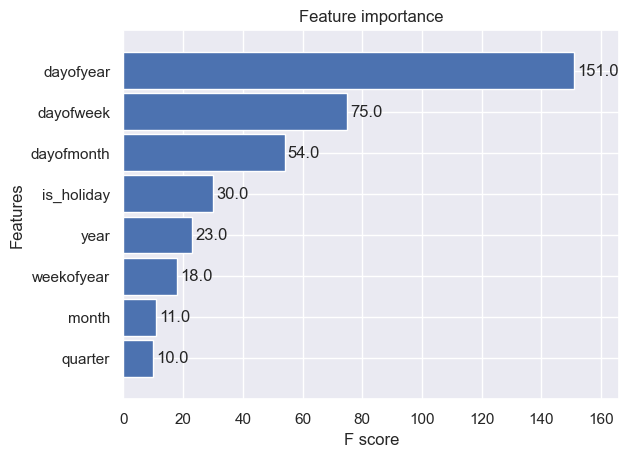

In [110]:
plot_importance(reg, height=0.9)

In [111]:
predictions_xgboost = reg.predict(X_test)

mape_xgboost = mape(y_test, predictions_xgboost)
rmse_xgboost = rmse(y_test, predictions_xgboost)

print(f'Root Mean Squared Error | RMSE: {rmse_xgboost}')
print(f'Mean Absolute Percentage Error | MAPE: {mape_xgboost}')

Root Mean Squared Error | RMSE: 11457.34
Mean Absolute Percentage Error | MAPE: 51.29


In [112]:
start_date = datetime(2018, 4, 30)
end_date = start_date + pd.DateOffset(days=180)
full_range = pd.date_range(start=start_date, end=end_date, freq='D')
filtered_data = holiday.loc[(holiday.index >= start_date) & (holiday.index <= end_date)]
forecast_df=pd.DataFrame(data=filtered_data, index=full_range, columns=['is_holiday'])

In [113]:
# make forecast
X_forecast = create_features(forecast_df)
X_forecast['is_holiday'] = forecast_df['is_holiday']

In [114]:
xgboost_forecast = reg.predict(X_forecast)

In [115]:
# create df for all y values
y_train_df = pd.DataFrame(y_train, train_df.index, columns=['total_amount'] )
y_test_df = pd.DataFrame(y_test, test_df.index, columns=['total_amount'] )
xgboost_forecast_df=pd.DataFrame(xgboost_forecast, forecast_df.index, columns=['Forecast'] )

In [116]:
plot_test_predictions(y_test_df['total_amount'], predictions_xgboost)

In [117]:
# plot forecast
plot_forecast(y_train_df['total_amount'], y_test_df['total_amount'], xgboost_forecast_df['Forecast'])

**Observation:**
- Sao trông nó lại như thế lày :))

## 7.3. Tunning XGBoost

In [118]:
num_estimators= [i for i in range(100, 1010, 100)]
depth=[i for i in range(3, 15, 1)]
#learning=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
learning=[0.0001, 0.001, 0.01]

In [119]:
XGB_summary=pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'MAPE', 'RMSE' ])

for i in num_estimators:
    for j in depth:
        for k in learning:
            model_reg= xgb.XGBRegressor(n_estimators=i, max_depth=j, learning_rate=k )
            model_reg.fit(X_train, y_train)
            predictions_xgboost = model_reg.predict(X_test)
            mape_xgboost=np.mean(np.abs((y_test - predictions_xgboost)/y_test))*100
            rmse_xgboost = np.sqrt(np.mean((y_test-predictions_xgboost)**2))
            data_param={'n_estimators': i,
                        'max_depth': j,
                        'learning_rate': k,
                        'MAPE': mape_xgboost,
                        'RMSE' : rmse_xgboost }
            XGB_summary=pd.concat([XGB_summary, pd.DataFrame(data_param, columns=XGB_summary.columns, index=[1])], ignore_index=True)


In [120]:
XGB_summary.sort_values(by ='MAPE', ascending=True).head(10)

,n_estimators,max_depth,learning_rate,MAPE,RMSE
238,700,10,0.001,45.178020,12812.220025
247,700,13,0.001,45.178666,12812.157765
244,700,12,0.001,45.178666,12812.157765
250,700,14,0.001,45.178666,12812.157765
241,700,11,0.001,45.178666,12812.157765
235,700,9,0.001,45.197038,12819.082987
232,700,8,0.001,45.332773,12765.293031
280,800,12,0.001,45.367066,12541.448630
277,800,11,0.001,45.367066,12541.448630
286,800,14,0.001,45.367066,12541.448630


In [121]:
reg_tunned = xgb.XGBRegressor(n_estimators=700, max_depth=10, learning_rate=0.001)
reg_tunned.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=50,
    verbose=True
)


[0]	validation_0-rmse:14387.49037	validation_1-rmse:16224.34255
[1]	validation_0-rmse:14376.91118	validation_1-rmse:16214.45997
[2]	validation_0-rmse:14366.34268	validation_1-rmse:16204.59258
[3]	validation_0-rmse:14355.78483	validation_1-rmse:16194.74008
[4]	validation_0-rmse:14345.23744	validation_1-rmse:16184.90306
[5]	validation_0-rmse:14334.70129	validation_1-rmse:16175.08125
[6]	validation_0-rmse:14324.17470	validation_1-rmse:16165.27559
[7]	validation_0-rmse:14313.65852	validation_1-rmse:16155.48355
[8]	validation_0-rmse:14303.15242	validation_1-rmse:16145.70764
[9]	validation_0-rmse:14292.65617	validation_1-rmse:16135.94718
[10]	validation_0-rmse:14282.17033	validation_1-rmse:16126.20104
[11]	validation_0-rmse:14271.69482	validation_1-rmse:16116.47013
[12]	validation_0-rmse:14261.22906	validation_1-rmse:16106.75530
[13]	validation_0-rmse:14250.77299	validation_1-rmse:16097.05411
[14]	validation_0-rmse:14240.32723	validation_1-rmse:16087.36908
[15]	validation_0-rmse:14229.89163	

[16]	validation_0-rmse:14219.46585	validation_1-rmse:16068.04371
[17]	validation_0-rmse:14209.05042	validation_1-rmse:16058.40359
[18]	validation_0-rmse:14198.64520	validation_1-rmse:16048.77929
[19]	validation_0-rmse:14188.24960	validation_1-rmse:16039.16874
[20]	validation_0-rmse:14177.86366	validation_1-rmse:16029.57403
[21]	validation_0-rmse:14167.48794	validation_1-rmse:16019.99380
[22]	validation_0-rmse:14157.12242	validation_1-rmse:16010.42883
[23]	validation_0-rmse:14146.76681	validation_1-rmse:16000.87902
[24]	validation_0-rmse:14136.42120	validation_1-rmse:15991.34348
[25]	validation_0-rmse:14126.08585	validation_1-rmse:15981.82400
[26]	validation_0-rmse:14115.76007	validation_1-rmse:15972.31822
[27]	validation_0-rmse:14105.44416	validation_1-rmse:15962.82825
[28]	validation_0-rmse:14095.13809	validation_1-rmse:15953.35261
[29]	validation_0-rmse:14084.84239	validation_1-rmse:15943.89196
[30]	validation_0-rmse:14074.55627	validation_1-rmse:15934.44593
[31]	validation_0-rmse:14

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
predictions_xgboost_tunned = reg_tunned.predict(X_test)

mape_xgboost_tunned = mape(y_test, predictions_xgboost_tunned)
rmse_xgboost_tunned = rmse(y_test, predictions_xgboost_tunned)

print(f'Root Mean Squared Error | RMSE: {rmse_xgboost_tunned}')
print(f'Mean Absolute Percentage Error | MAPE: {mape_xgboost_tunned}')

Root Mean Squared Error | RMSE: 12812.22
Mean Absolute Percentage Error | MAPE: 45.18


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

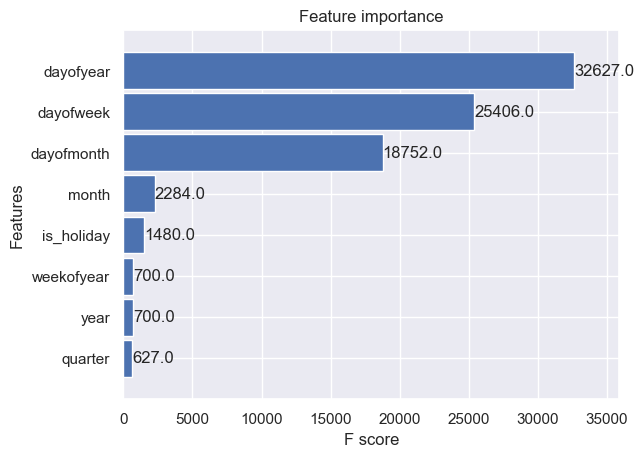

In [123]:
#plot feature importance
plot_importance(reg_tunned, height=0.9)

In [124]:
plot_test_predictions(y_test_df['total_amount'], predictions_xgboost_tunned)

In [125]:
plot_forecast(y_train_df['total_amount'], y_test_df['total_amount'], xgboost_forecast_df['Forecast'])

**Observation:**
- Đường dự đoán thể hiện khá tốt khi dự đoán chính xác theo ngay, nhưng không năm bắt được các biến động dữ liệu tốt

In [126]:
#predictions_xgb_df=pd.DataFrame(predictions_xgb, y_test_df.index, columns=['Predictions'] )

# 8. Conclusion

**Summary**

|Model|Mape|
|--|--|
|SARIMA(1,1,1)(0,1,1)(7) | 68.99 |
|SARIMA(1,1,2)(0,1,1)(7) with Holiday | 65.66 |
| Basic FB Prophet | 75.24 |
| Basic FB Prophet with holiday | 75.79 |
| Tunned FB Prophet with holiday | 49.24 |
| Basic XGboost with holiday | 51.29 |
| Tunned XGboost with holiday | 45.18 | 

In [131]:
#plotting all the models together
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['total_amount'].values, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['total_amount'].values, mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=test_df.index, y=sarimax_predictions.values, mode='lines', name='SARIMA tunned'))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_tunned[-121:].reset_index()['yhat'].values, mode='lines', name='FB Prophet tunned'))
fig.add_trace(go.Scatter(x=test_df.index, y=predictions_xgboost_tunned, mode='lines', name='XGBoost tunned'))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title='Revenue amount', xaxis_title='Date', title='Daily Sales amount and forecast using different models')

fig.show()
